In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import csv

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans

import sklearn
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import math
from sklearn.metrics import mean_squared_error

from datetime import datetime

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud


In [2]:
case = pd.read_csv('../processed_data/legal_text_classification.csv')
case = case.dropna(subset=['case_text'])
case

FileNotFoundError: [Errno 2] No such file or directory: '../processed_data/legal_text_classification.csv'

In [ ]:
import re
import pandas as pd
import nltk
from gensim.parsing.preprocessing import preprocess_string

# clean, tokenize, and stem the text data
def preprocess_text(text):
    # remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    # remove any non-alphanumeric characters and convert to lowercase
    text = re.sub('[,\.!?]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\'", "", text)
    text = text.lower()
    
#     # tokenize the text and remove stop words
#     tokens = simple_preprocess(text, deacc=True)
#     tokens = [token for token in tokens if token not in stopwords.words('english')]
    
#     # stem the tokens using the Snowball stemmer
#     stemmer = SnowballStemmer('english')
#     stems = [stemmer.stem(token) for token in tokens]
    
#     # join the stemmed tokens back into a single string
#     text = ' '.join(stems)
    
#     return text


    # preprocess the text using gensim's preprocessing functions
    processed_text = preprocess_string(text)
    processed_text_str = ' '.join(processed_text)
    
    return processed_text_str

# apply the clean_text function to the column of text data in the DataFrame
case['case_text_processed'] = case['case_text'].apply(preprocess_text)



# def preprocess_text(text):
#     if isinstance(text, str):
#         text = re.sub('[,\.!?]', '', text)
#         text = text.lower()
#         return text
#     else:
#         return ''

# case['case_text_processed'] = case['case_text'].apply(preprocess_text)

# # creating and initializing the new column to empty string for all rows
# case['text_key_words'] = ""

# for index, row in case.iterrows():
#     keytext = row['case_text_processed']
    
#     # instantiating a Rake object
#     # by default it uses english stopwords from NLTK (natural language tool kit)
#     # and discards all puntuation characters
#     r = Rake()

#     # extracting the keywords from the text by passing keytext 
#     r.extract_keywords_from_text(keytext)

#     # getting the dictionary whith key words and their scores
#     key_words_dict_scores = r.get_word_degrees()
    
#     # assigning the key words to the new column
#     row['text_key_words'] = ' '.join(list(key_words_dict_scores.keys()))
    
case['case_text_processed'].head()

0    ordinarili discret exercis cost follow event a...
1    gener principl govern exercis discret award in...
2    ordinarili discret exercis cost follow event a...
3    gener principl govern exercis discret award in...
4    preced gener principl inform exercis discret d...
Name: case_text_processed, dtype: object

In [ ]:
case.head()

,case_id,case_outcome,case_title,case_text,case_text_processed
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,ordinarili discret exercis cost follow event a...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,gener principl govern exercis discret award in...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,ordinarili discret exercis cost follow event a...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,gener principl govern exercis discret award in...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,preced gener principl inform exercis discret d...


In [ ]:
vec = TfidfVectorizer()
x = case['case_text_processed']
x = vec.fit_transform(x)

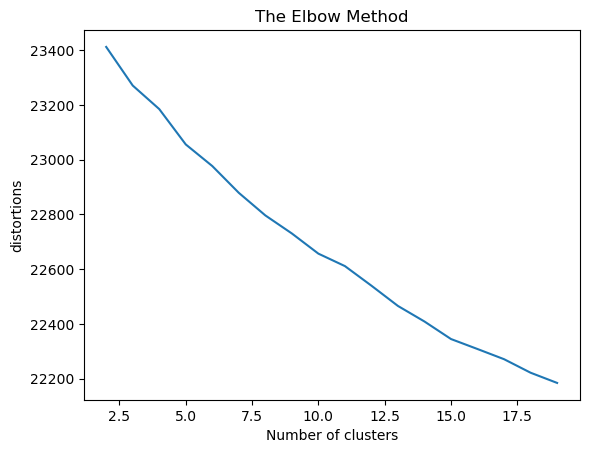

In [ ]:
#Elbow

distortions = []
# K = range(1,11)
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,init='random',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(2,20),distortions)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distortions')
plt.show()

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(x)
case_df = pd.DataFrame({'case_text' :case['case_text_processed'], 'topic_cluster' :y_km })

In [ ]:
km.inertia_

23185.11447766857

In [ ]:
case_df

,case_text,topic_cluster
0,ordinarili discret exercis cost follow event a...,3
1,gener principl govern exercis discret award in...,3
2,ordinarili discret exercis cost follow event a...,3
3,gener principl govern exercis discret award in...,3
4,preced gener principl inform exercis discret d...,2
...,...,...
24980,confin person control compani extend benefit p...,2
24981,threshold prescrib satisfi discret order secur...,2
24982,threshold prescrib satisfi discret order secur...,2
24983,given extent deumer stand gain proceed success...,2


In [ ]:
case_df_0 = case_df[case_df['topic_cluster'] == 0]
case_df_1 = case_df[case_df['topic_cluster'] == 1]
case_df_2 = case_df[case_df['topic_cluster'] == 2]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_n_words(corpus, n=10):
    vec = TfidfVectorizer()
    x = vec.fit_transform(corpus)
    sum_words = x.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

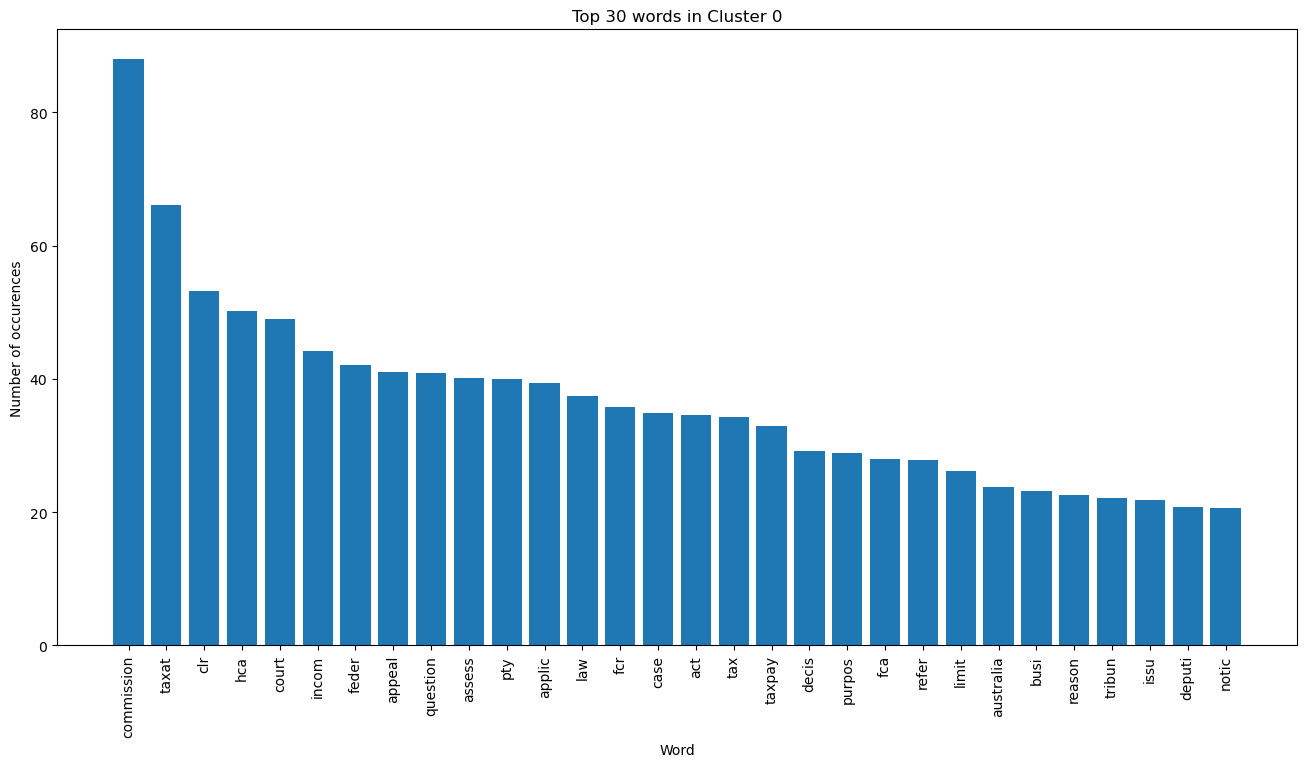

In [ ]:
words = []
word_values = []
for i,j in get_top_n_words(case_df_0['case_text'],30):
  words.append(i)
  word_values.append(j)
    
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 30 words in Cluster 0');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

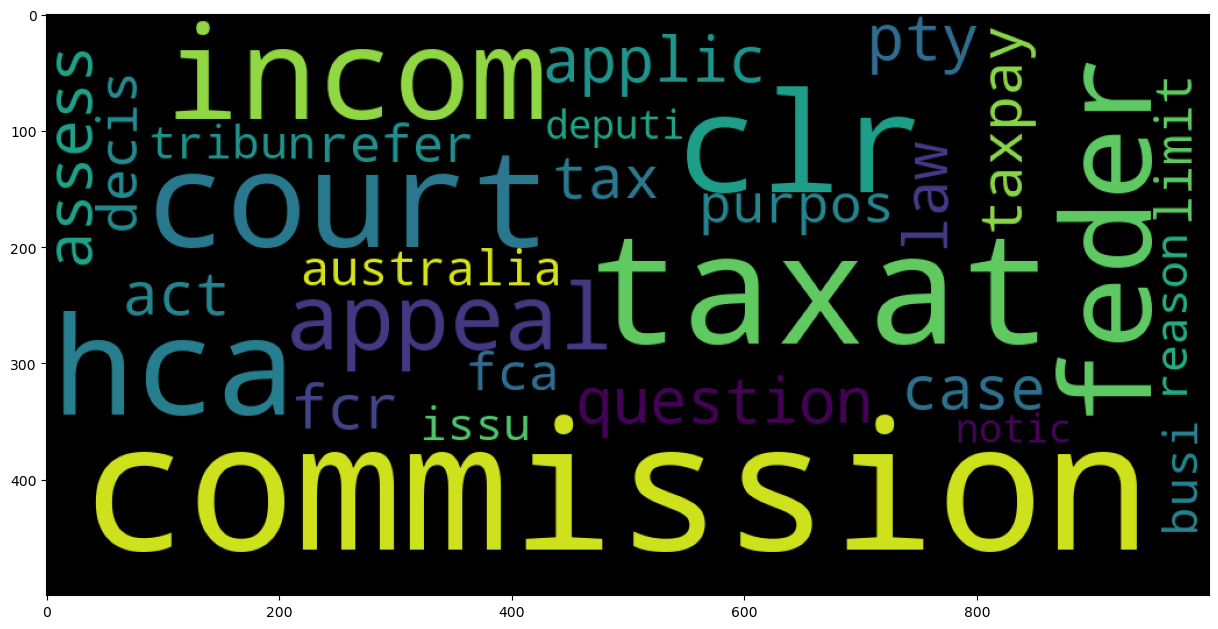

In [ ]:
res = dict(zip(words, word_values))

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(res)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

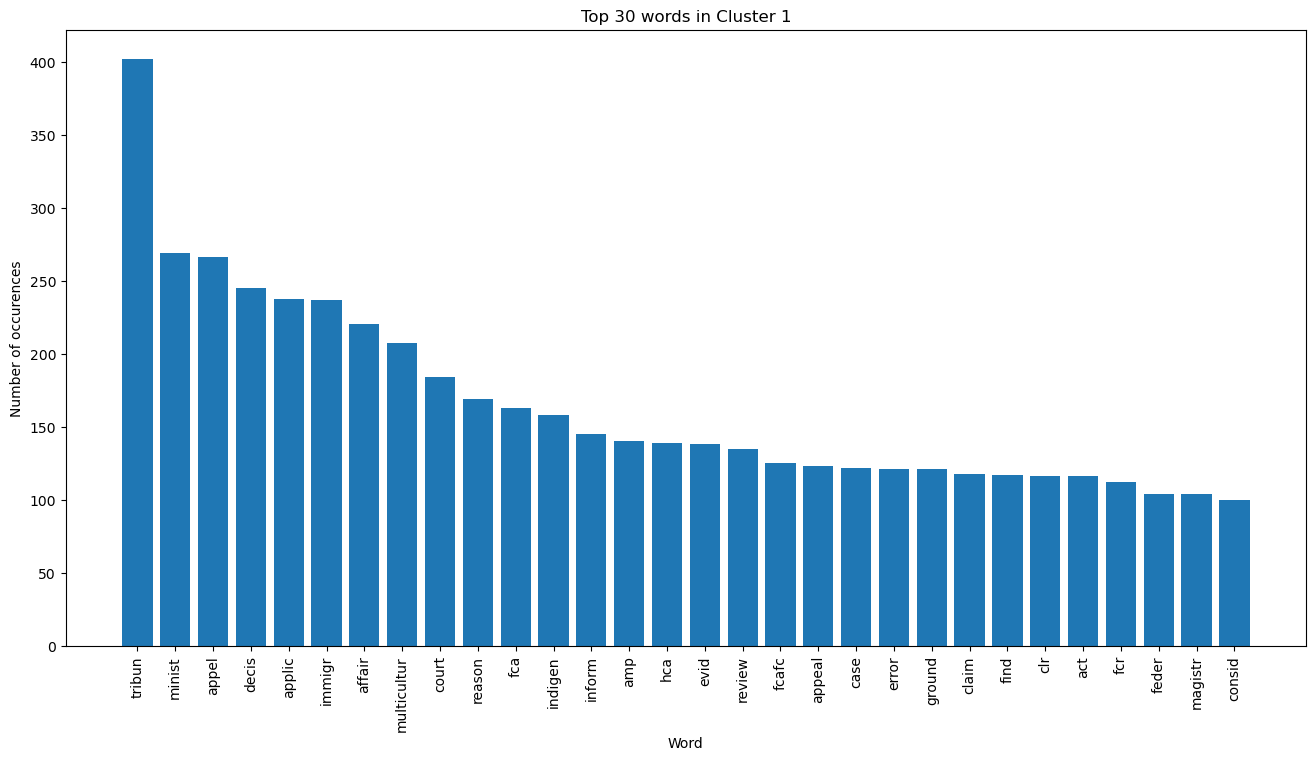

In [ ]:
words = []
word_values = []
for i,j in get_top_n_words(case_df_1['case_text'],30):
  words.append(i)
  word_values.append(j)
    
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 30 words in Cluster 1');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

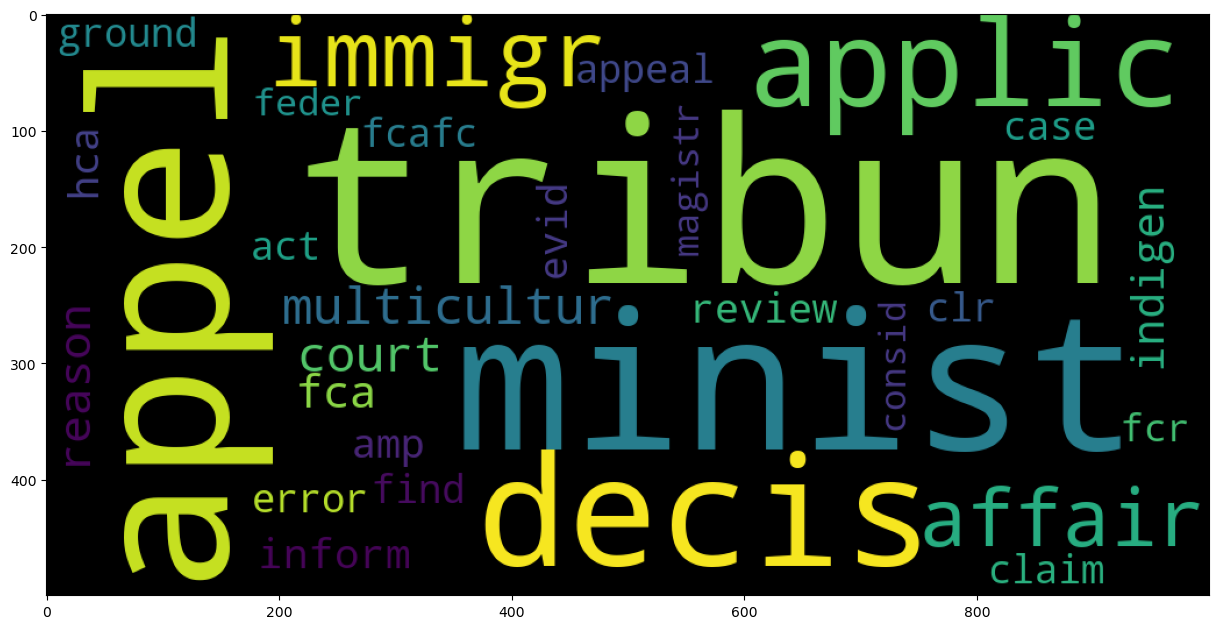

In [ ]:
res = dict(zip(words, word_values))

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(res)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

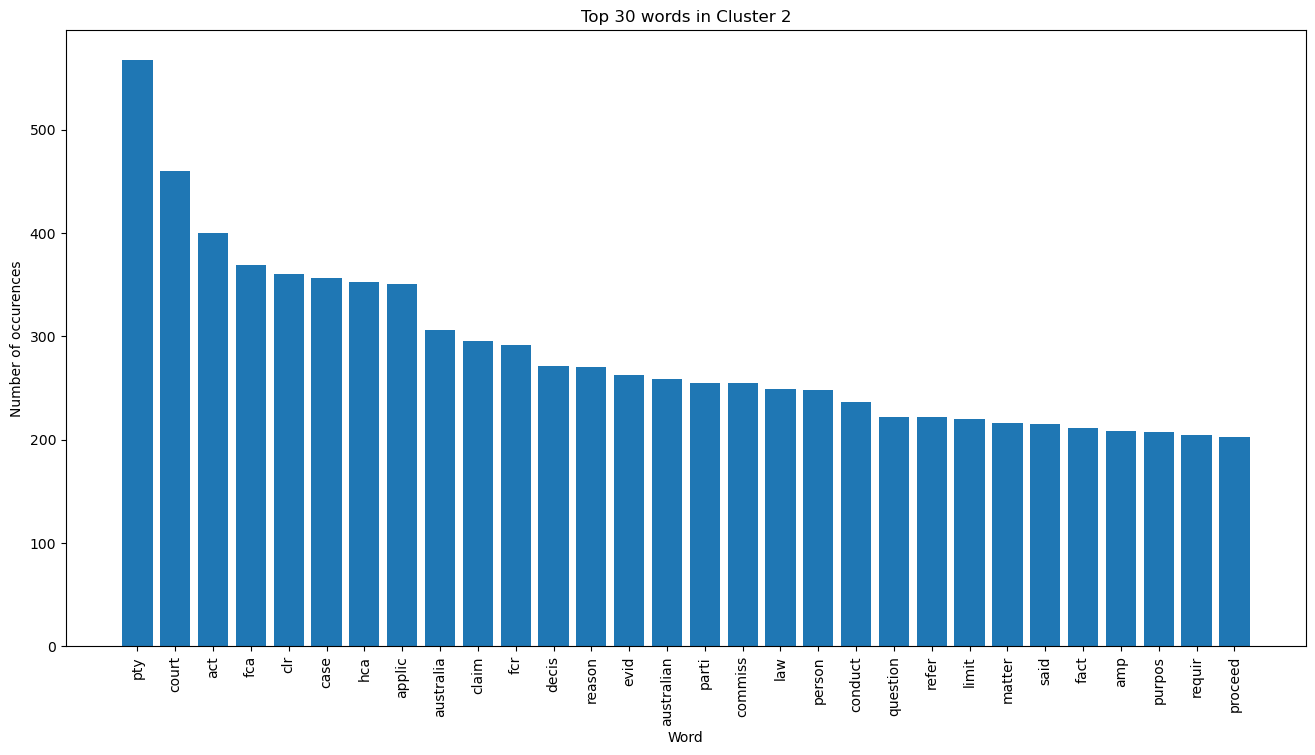

In [ ]:
words = []
word_values = []
for i,j in get_top_n_words(case_df_2['case_text'],30):
  words.append(i)
  word_values.append(j)
    
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 30 words in Cluster 2');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

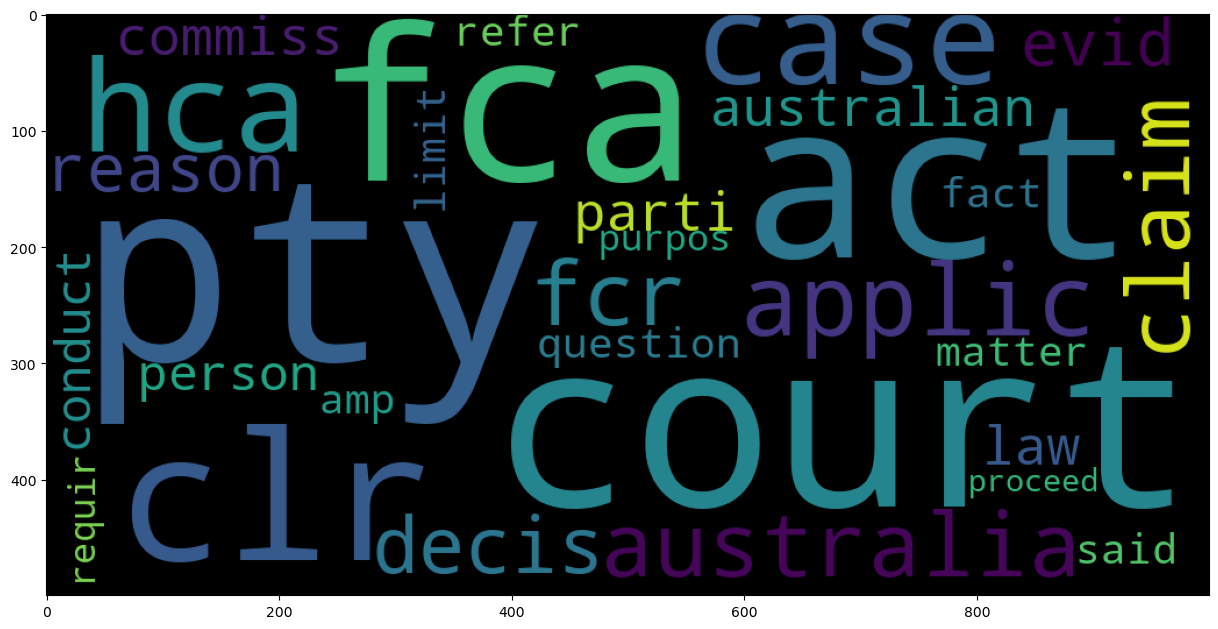

In [ ]:
res = dict(zip(words, word_values))

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(res)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)